In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/housedata/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

(4600, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dt

In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['year_sold']=pd.to_datetime(df['date']).dt.year
df['house_age']=df['year_sold']-df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [8]:
df = df.drop(['date','year_sold','country'], axis=1)

In [9]:
cols_to_drop=[
    'sqft_above', #included in total_sqft
    'sqft_basement', #included in total_sqft
    'bedrooms',  #included in total_rooms
    'bathrooms',  #included in total_rooms
    'yr_built',  #included in house_age
    'yr_renovated',  #included in its is_renovated
]
# Drop them all at once
df=df.drop(columns = cols_to_drop)
print("Data is now clean and ready for the model!")

Data is now clean and ready for the model!


In [10]:
df.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,statezip,total_sqft,total_rooms,house_age,is_renovated
0,313000.0,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,WA 98133,1340,4.50,59,1
1,2384000.0,3650,9050,2.0,0,4,5,709 W Blaine St,Seattle,WA 98119,3650,7.50,93,0
2,342000.0,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,WA 98042,1930,5.00,48,0
3,420000.0,2000,8030,1.0,0,0,4,857 170th Pl NE,Bellevue,WA 98008,2000,5.25,51,0
4,550000.0,1940,10500,1.0,0,0,4,9105 170th Ave NE,Redmond,WA 98052,1940,6.50,38,1


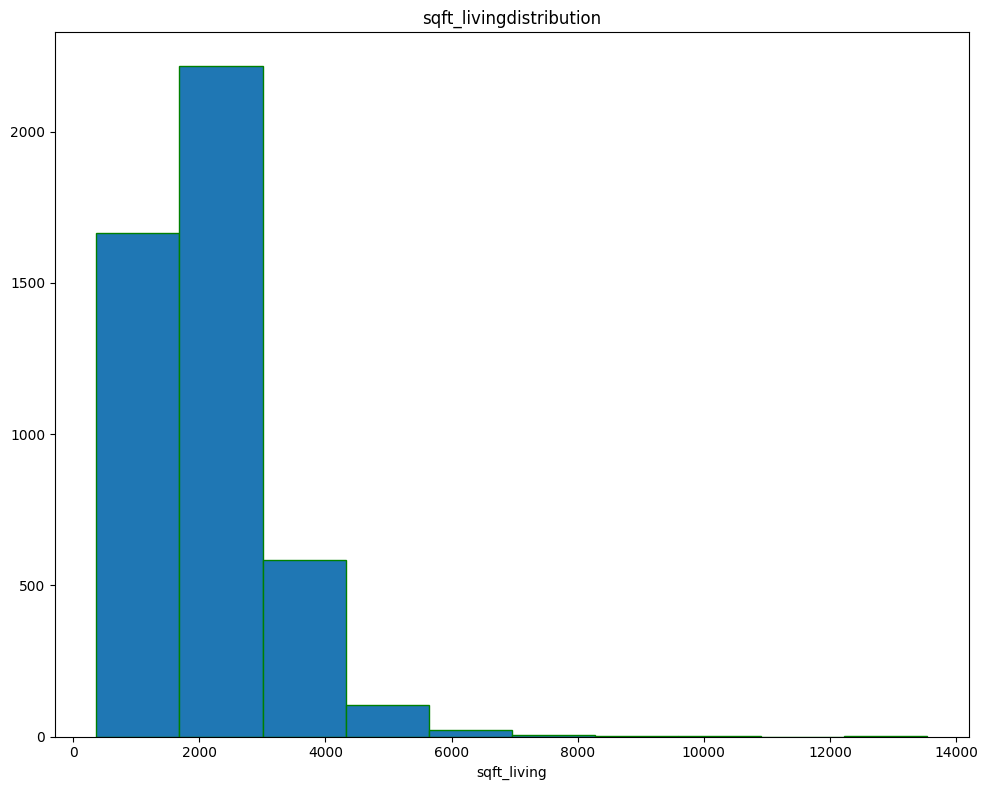

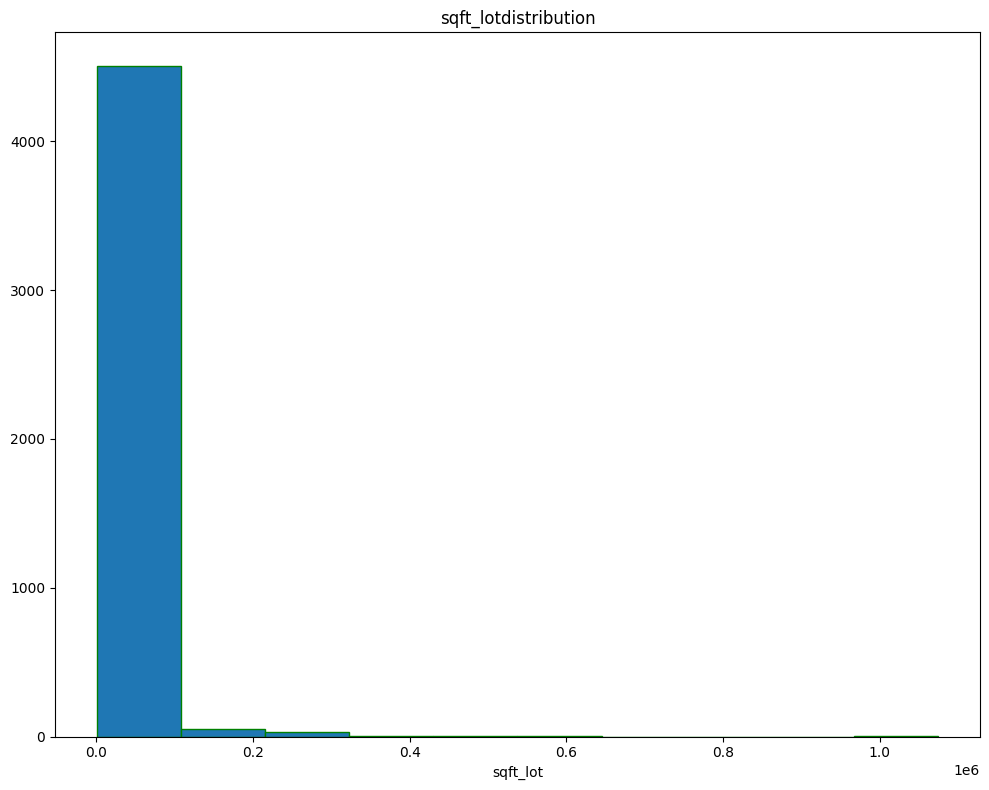

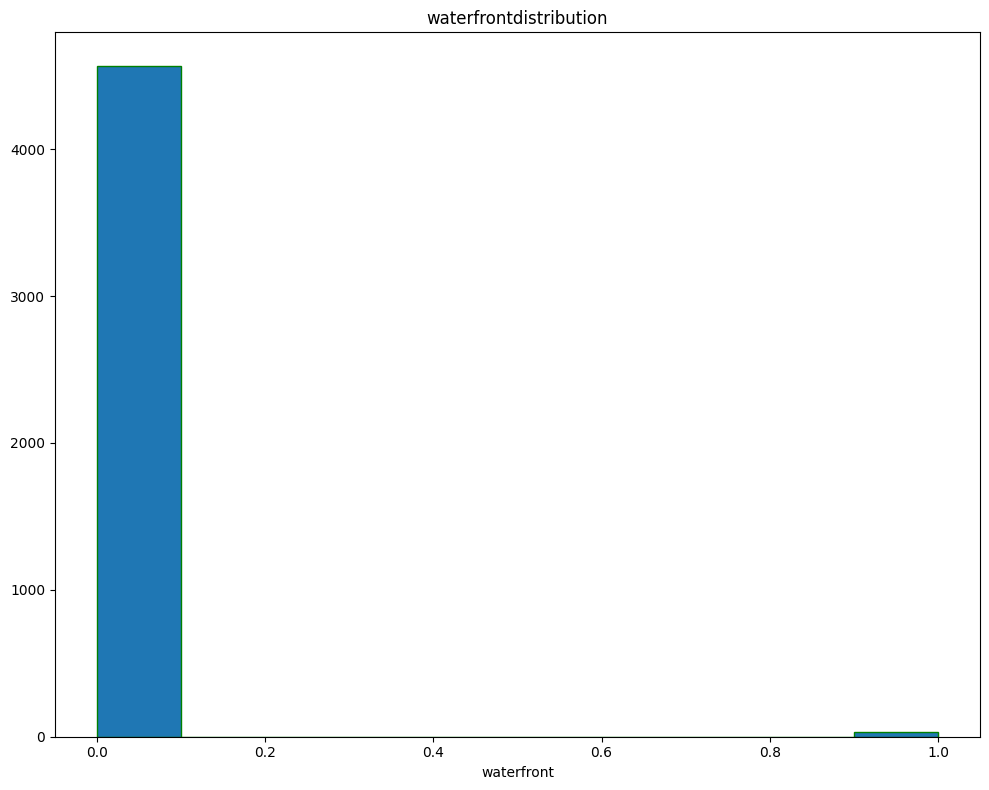

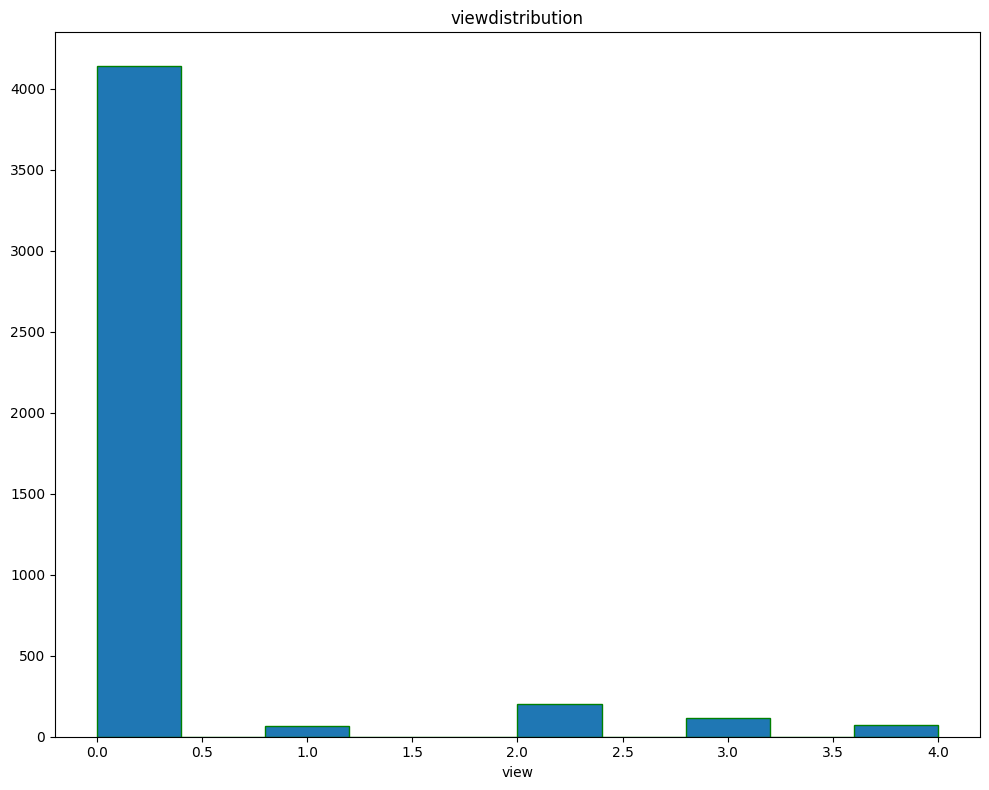

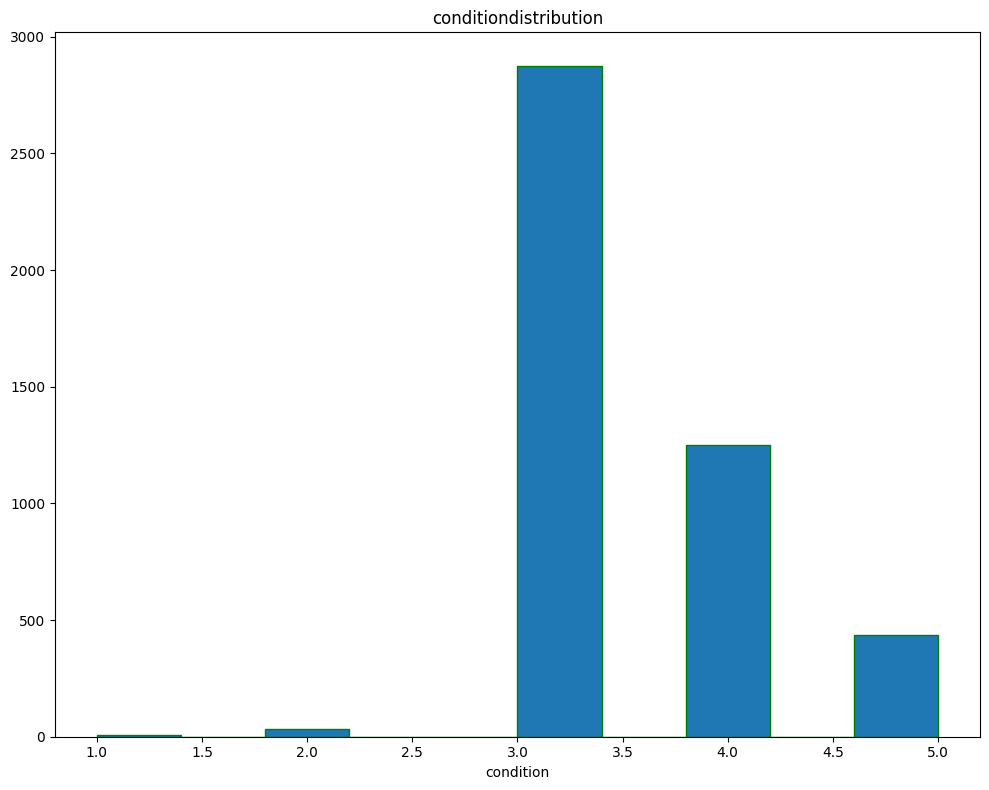

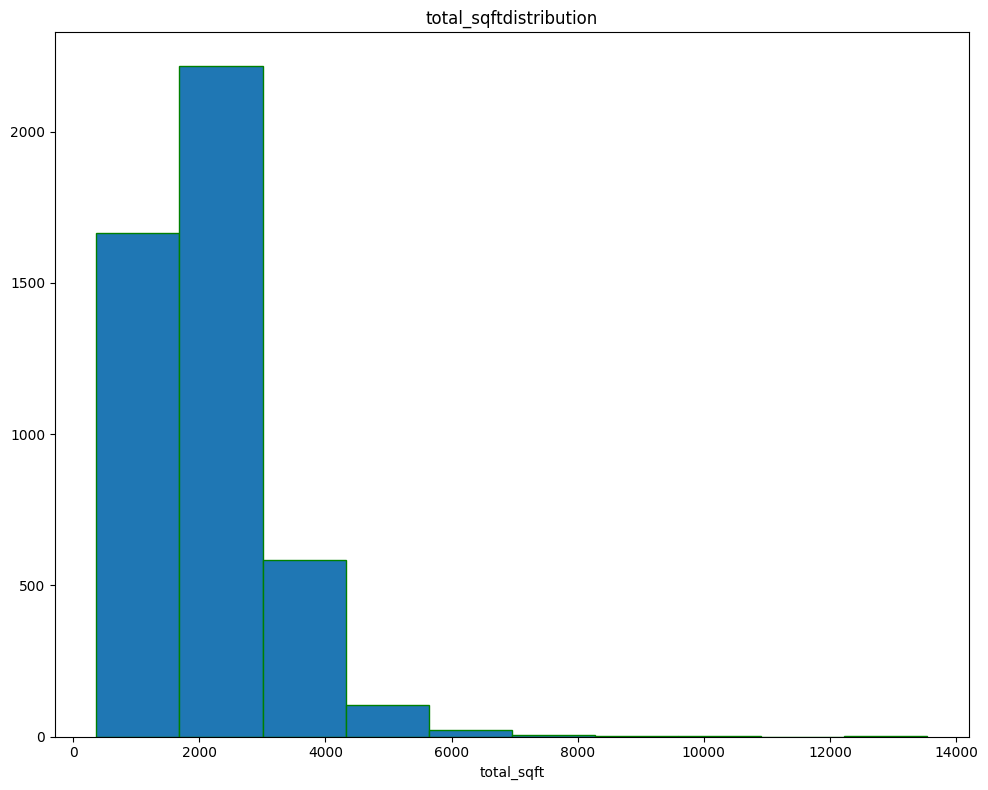

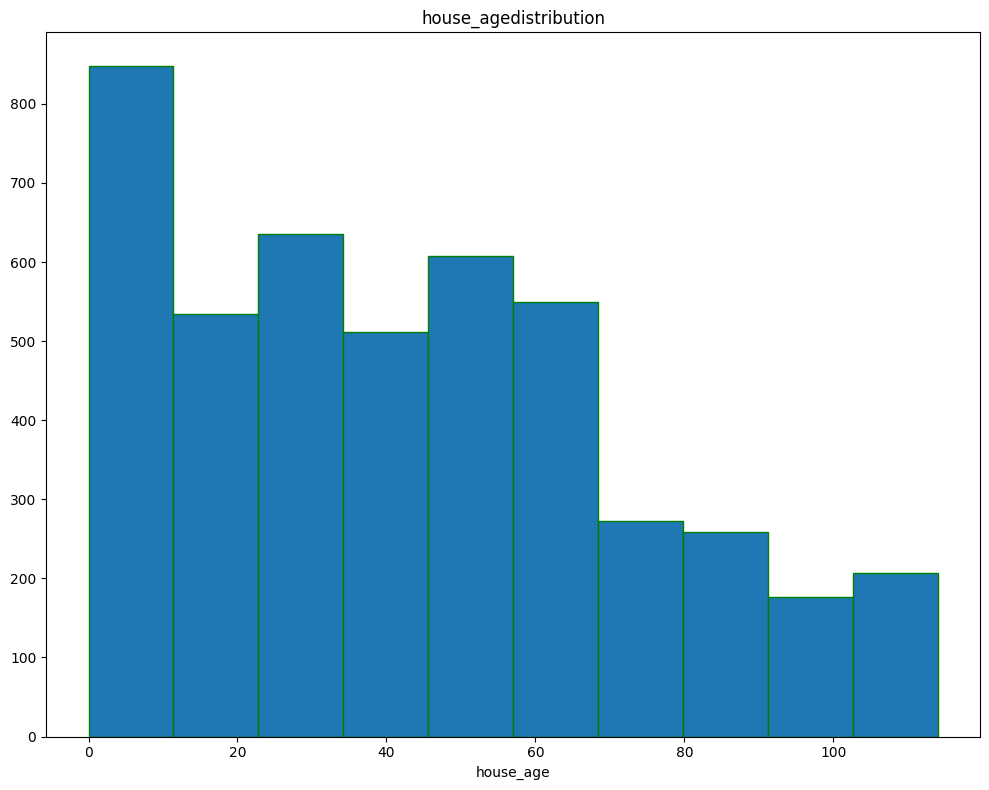

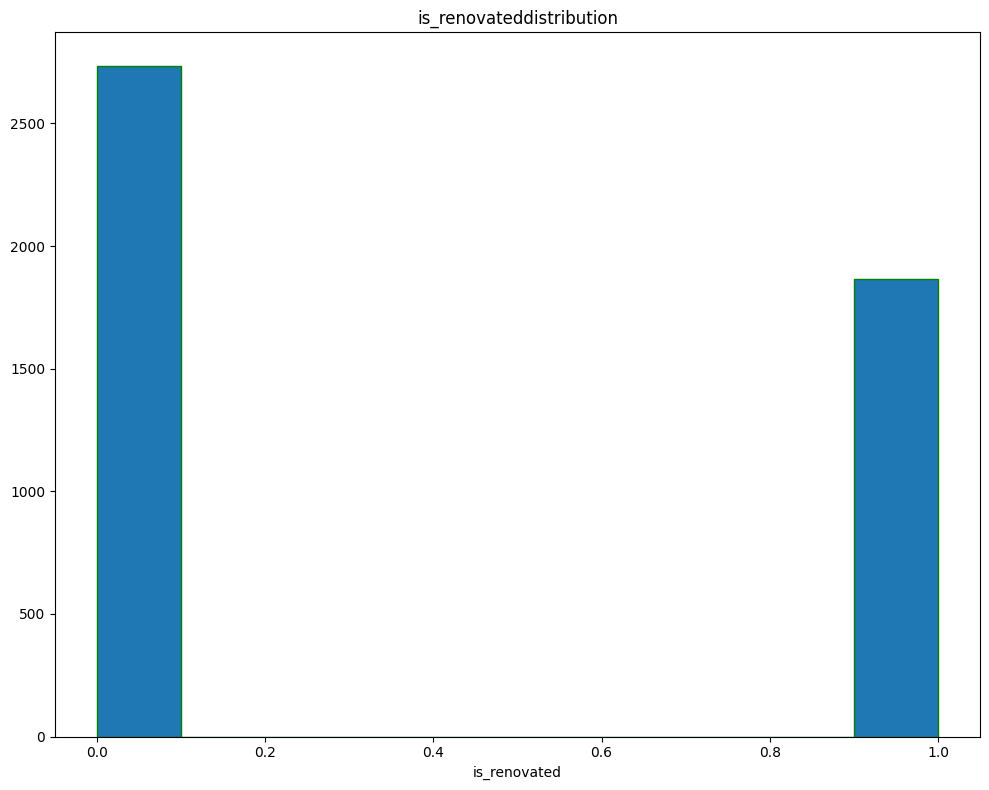

In [11]:
# this i used to print column name in data frame f"{i}
num_cols = df.select_dtypes(include=['int64'])
for i in num_cols:
    plt.figure(figsize=(10,8))
    plt.title(f"{i}distribution")
    plt.hist(df[i], edgecolor='green')
    plt.xlabel(f"{i}")
    plt.tight_layout()
    plt.show

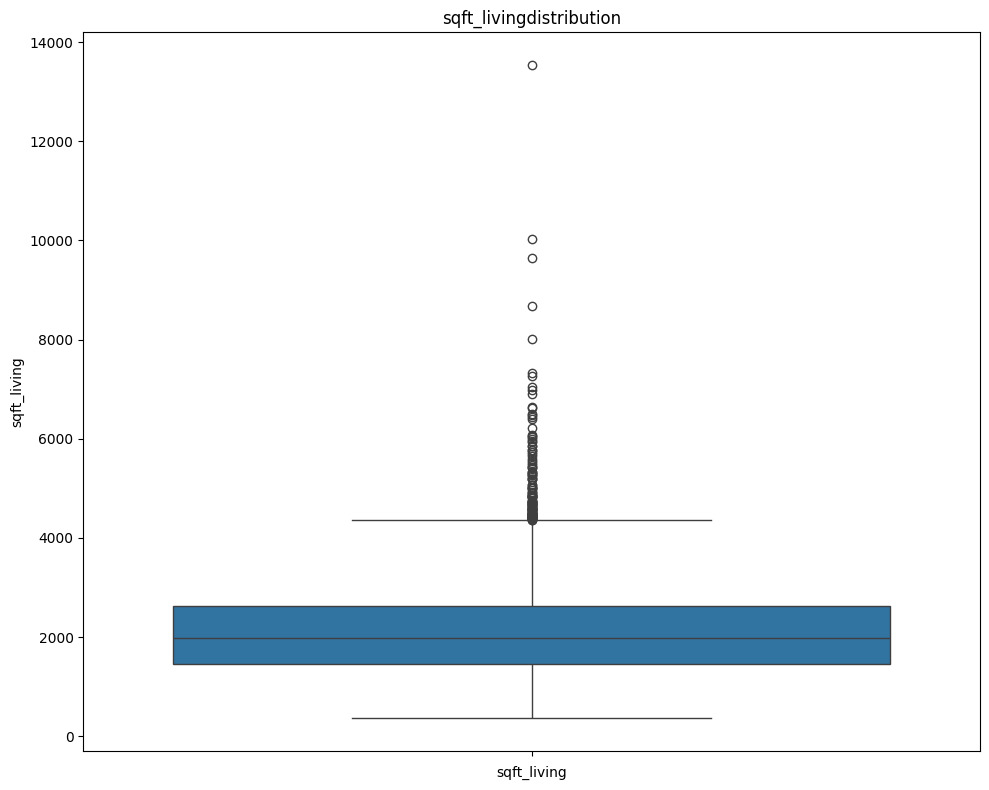

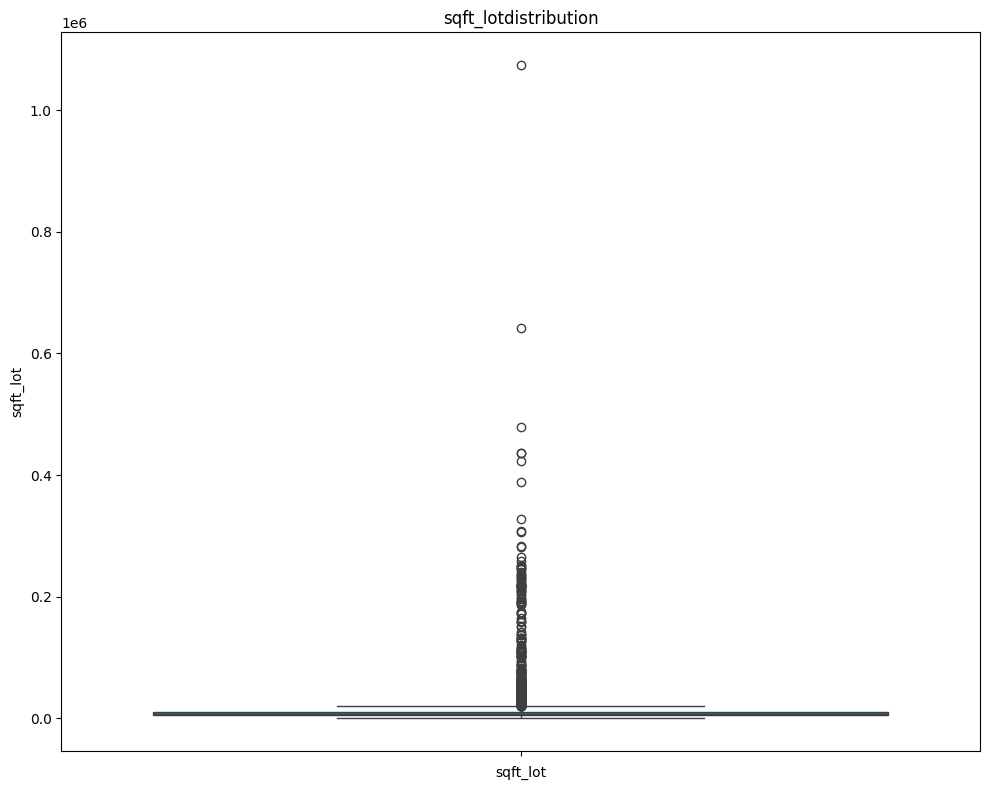

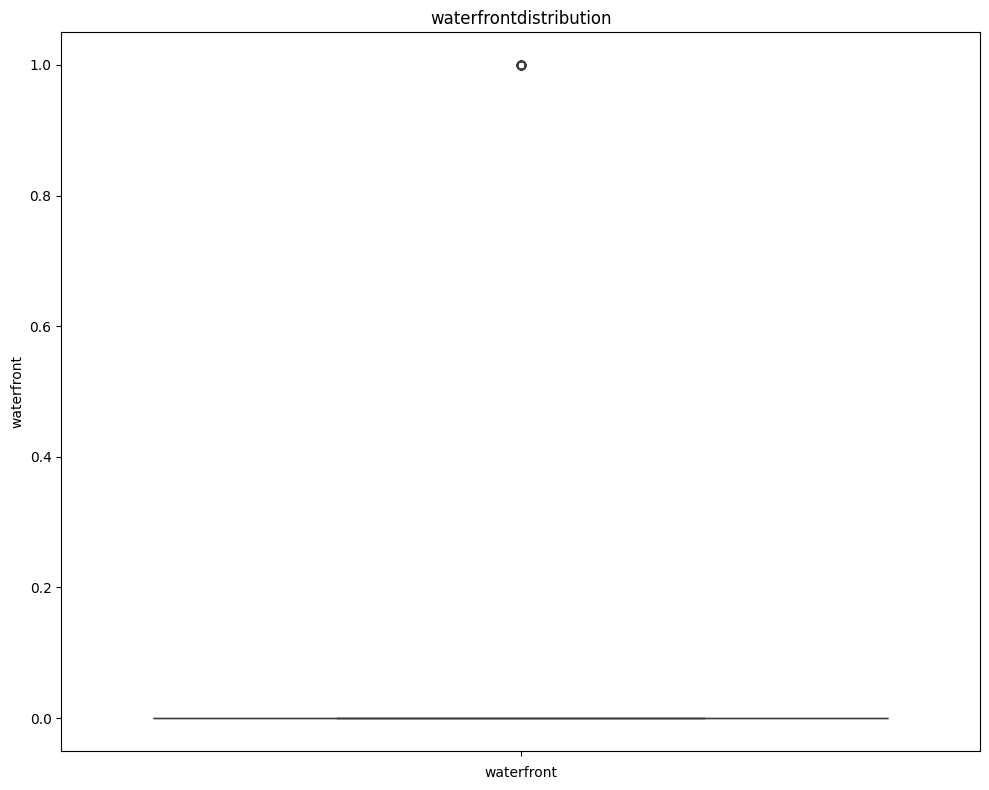

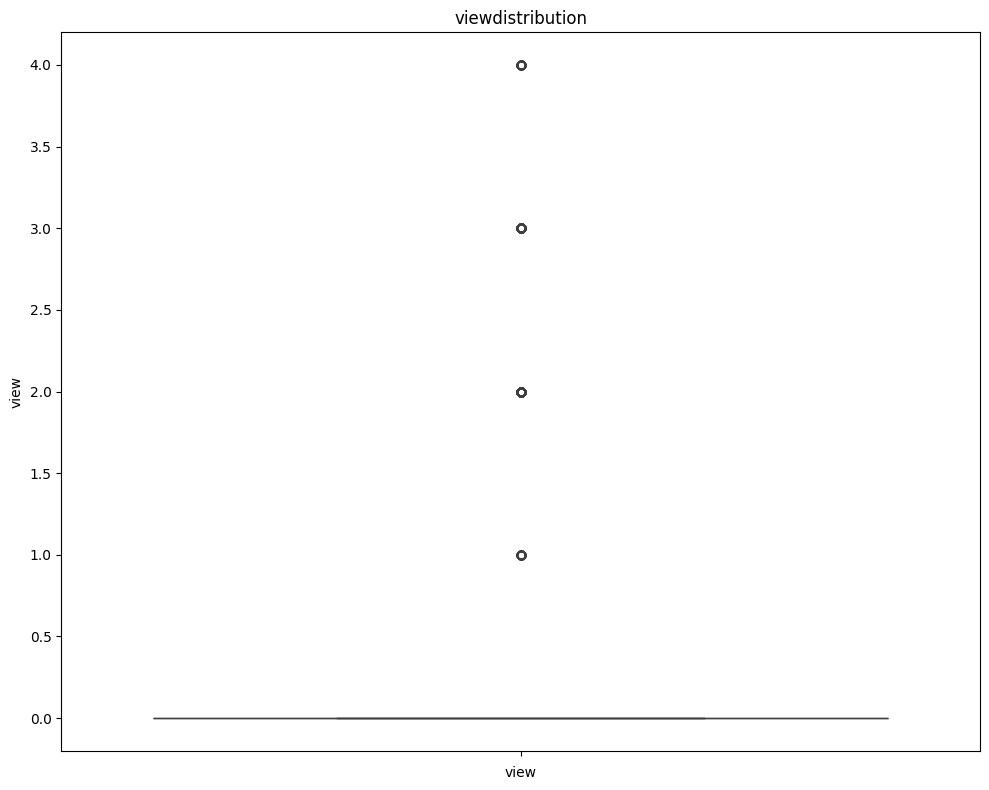

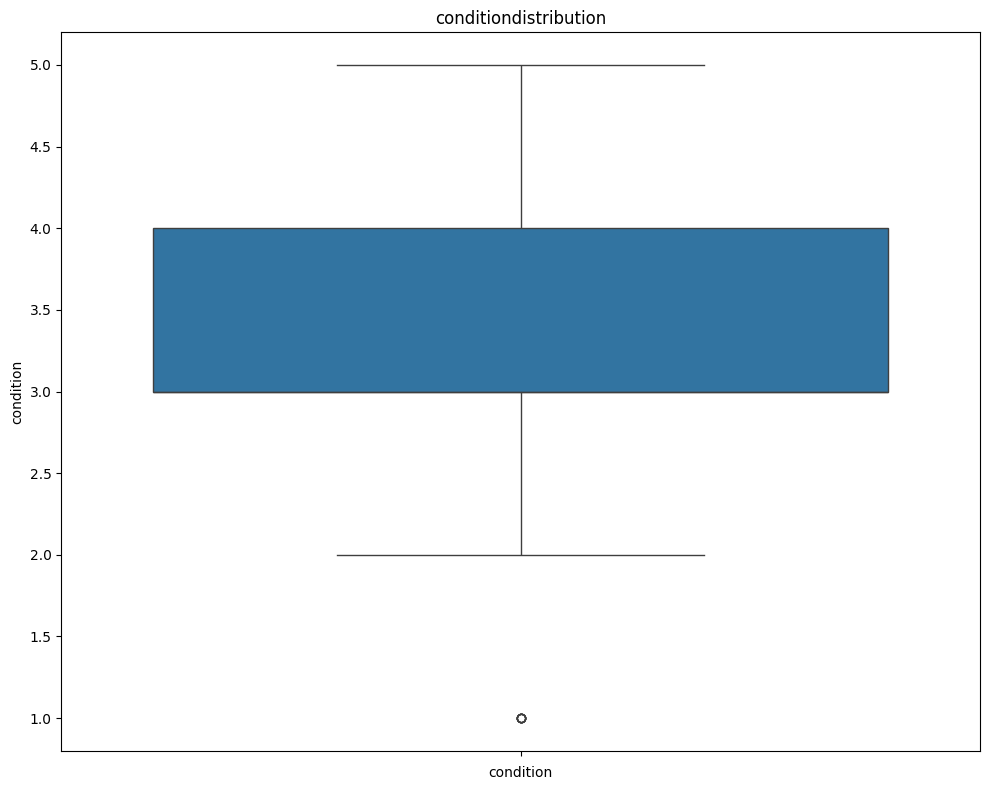

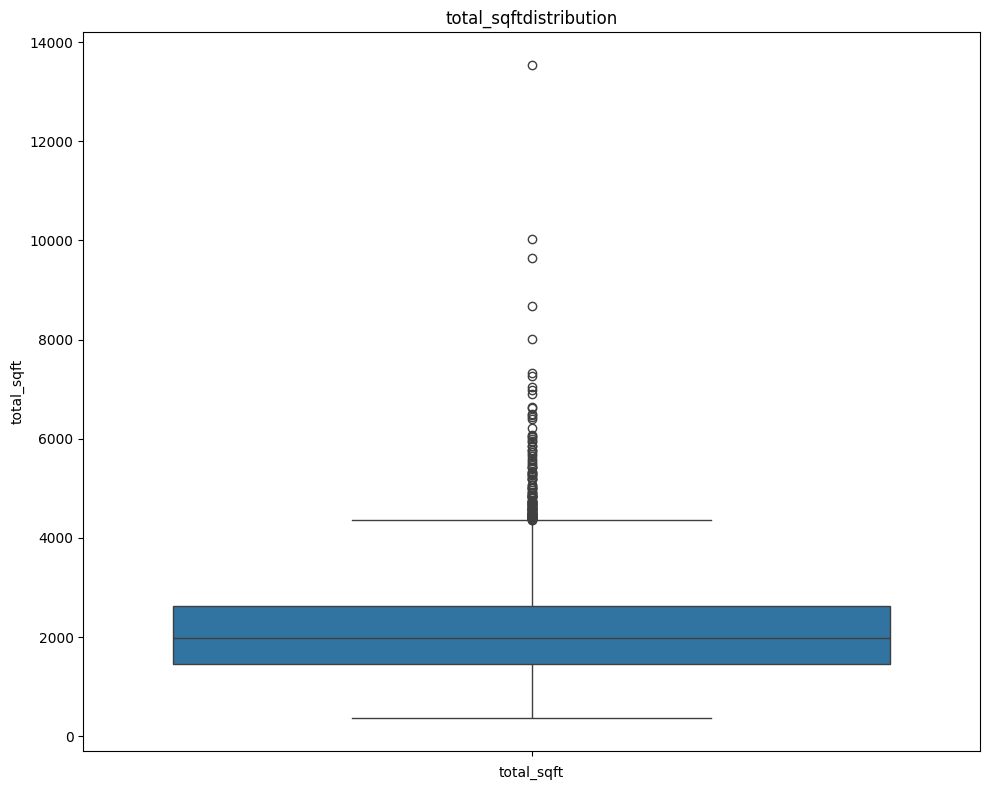

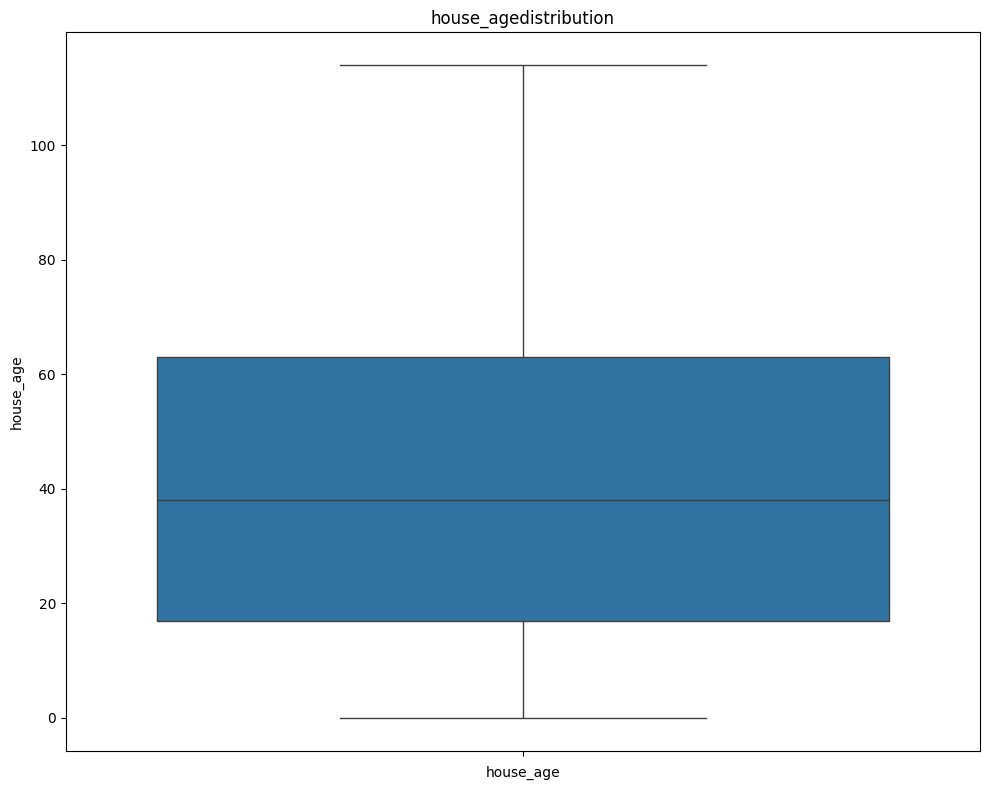

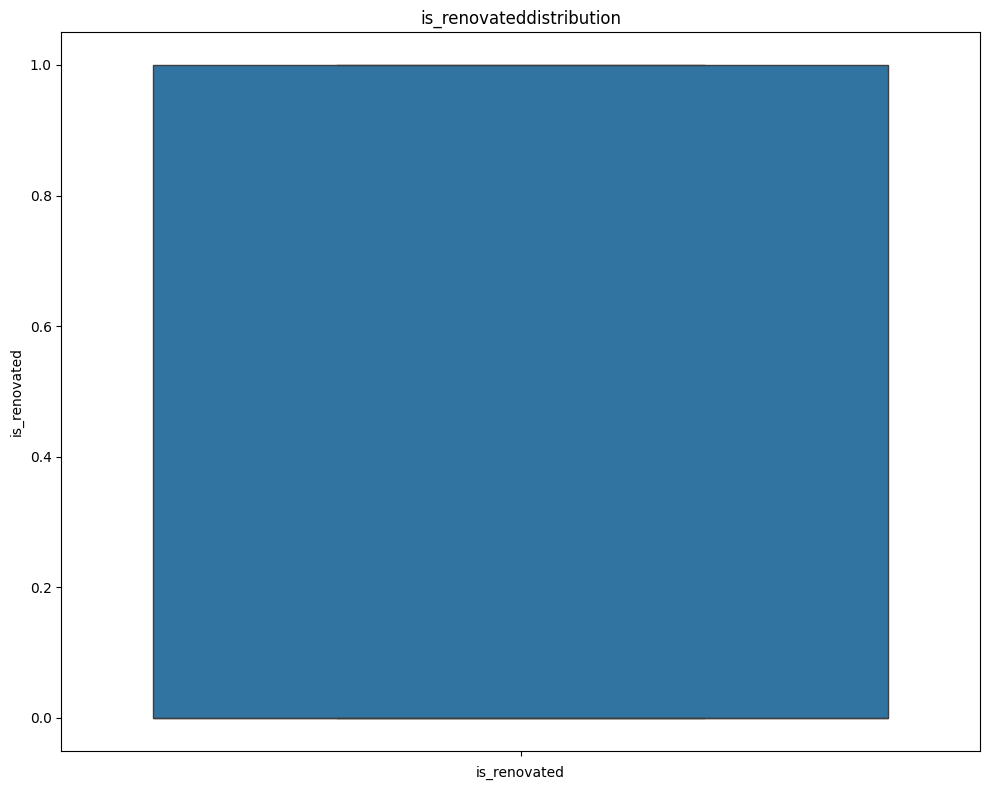

In [12]:
num_cols = df.select_dtypes(include=['int64'])
for i in num_cols:
    plt.figure(figsize=(10,8))
    plt.title(f"{i}distribution")
    sns.boxplot(df[i])
    plt.xlabel(f"{i}")
    plt.tight_layout()
    plt.show

In [13]:
cat_cols=df.select_dtypes(include=['object'])
cat_cols

,street,city,statezip
0,18810 Densmore Ave N,Shoreline,WA 98133
1,709 W Blaine St,Seattle,WA 98119
2,26206-26214 143rd Ave SE,Kent,WA 98042
3,857 170th Pl NE,Bellevue,WA 98008
4,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...
4595,501 N 143rd St,Seattle,WA 98133
4596,14855 SE 10th Pl,Bellevue,WA 98007
4597,759 Ilwaco Pl NE,Renton,WA 98059
4598,5148 S Creston St,Seattle,WA 98178


In [14]:
a=df.groupby("city")[["price"]].mean()

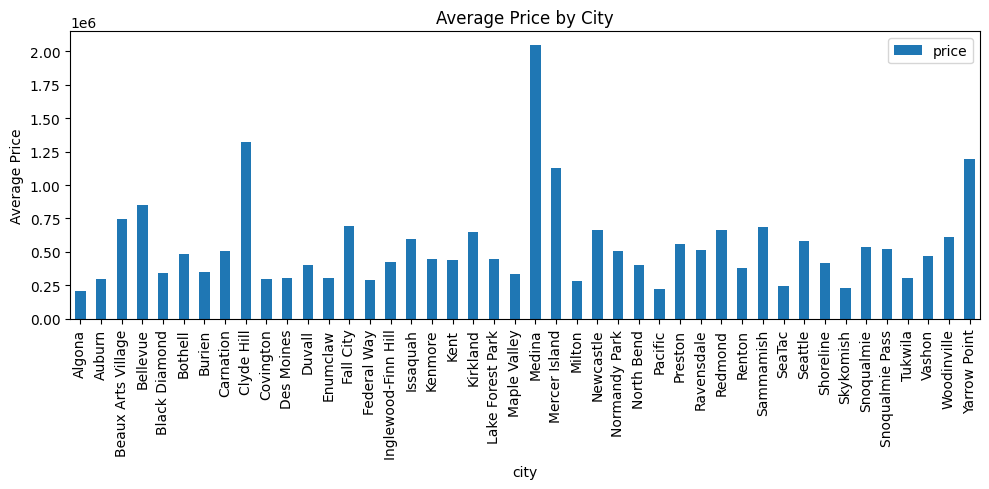

In [15]:
a.plot(kind="bar", figsize=(10,5), title="Average Price by City")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
c=df.groupby("statezip")[["price"]].mean()

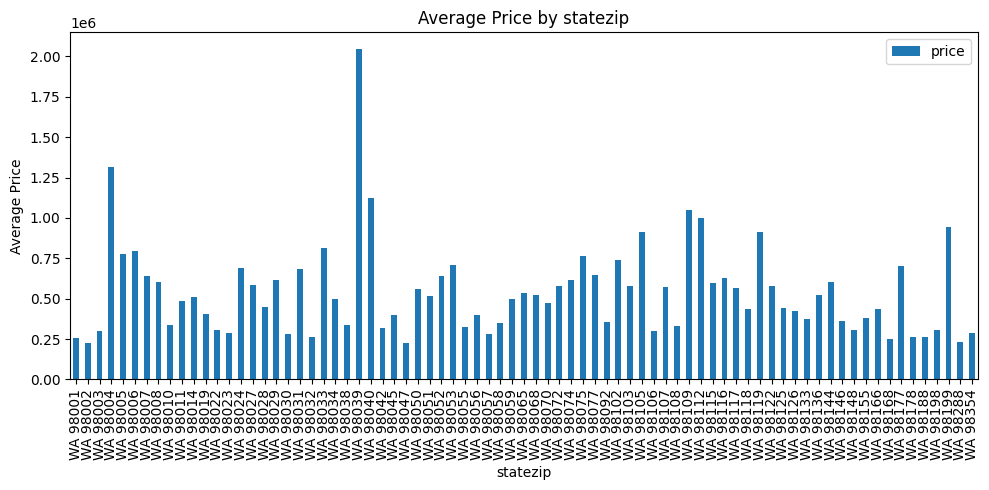

In [17]:
c.plot(kind="bar", figsize=(10,5), title="Average Price by statezip")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

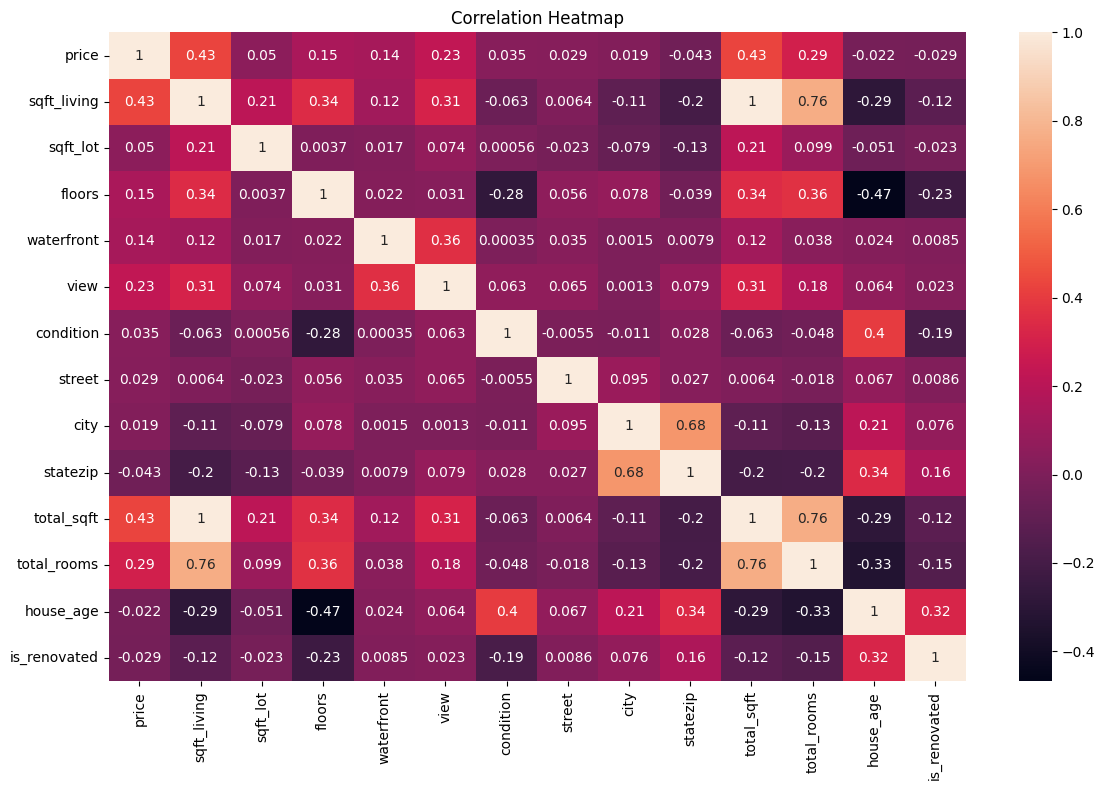

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [21]:
corr=df.corr()['price']
corr

price           1.000000
sqft_living     0.430410
sqft_lot        0.050451
floors          0.151461
waterfront      0.135648
view            0.228504
condition       0.034915
street          0.029366
city            0.018625
statezip       -0.043385
total_sqft      0.430410
total_rooms     0.294401
house_age      -0.021857
is_renovated   -0.028595
Name: price, dtype: float64

In [22]:
corr_abs=corr.abs().sort_values(ascending=False)
corr_abs

price           1.000000
sqft_living     0.430410
total_sqft      0.430410
total_rooms     0.294401
view            0.228504
floors          0.151461
waterfront      0.135648
sqft_lot        0.050451
statezip        0.043385
condition       0.034915
street          0.029366
is_renovated    0.028595
house_age       0.021857
city            0.018625
Name: price, dtype: float64

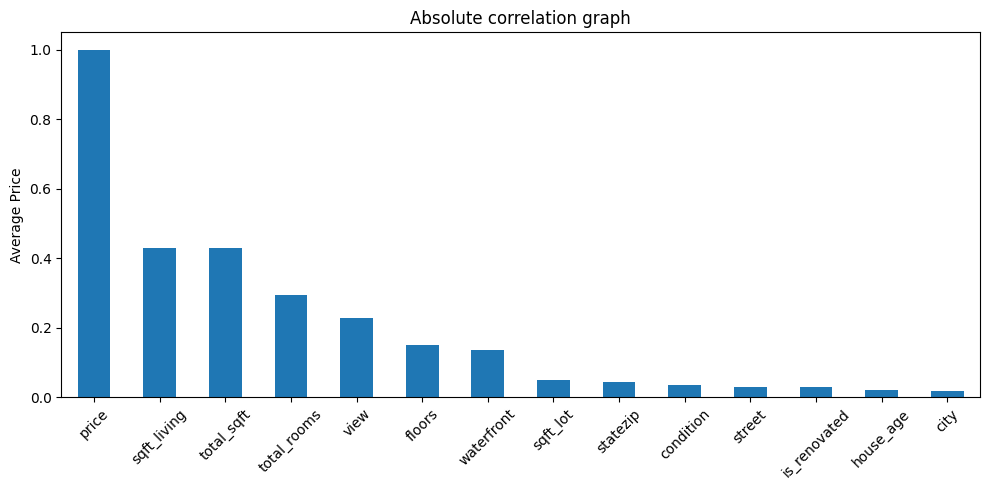

In [23]:
corr_abs.plot(kind='bar',figsize=(10,5), title="Absolute correlation graph")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
selected_features=corr_abs[corr_abs>=0.2].index
selected_features

Index(['price', 'sqft_living', 'total_sqft', 'total_rooms', 'view'], dtype='object')

In [25]:
final_df=df[selected_features]
final_df

,price,sqft_living,total_sqft,total_rooms,view
0,3.130000e+05,1340,1340,4.50,0
1,2.384000e+06,3650,3650,7.50,4
2,3.420000e+05,1930,1930,5.00,0
3,4.200000e+05,2000,2000,5.25,0
4,5.500000e+05,1940,1940,6.50,0
...,...,...,...,...,...
4595,3.081667e+05,1510,1510,4.75,0
4596,5.343333e+05,1460,1460,5.50,0
4597,4.169042e+05,3010,3010,5.50,0
4598,2.034000e+05,2090,2090,6.00,0


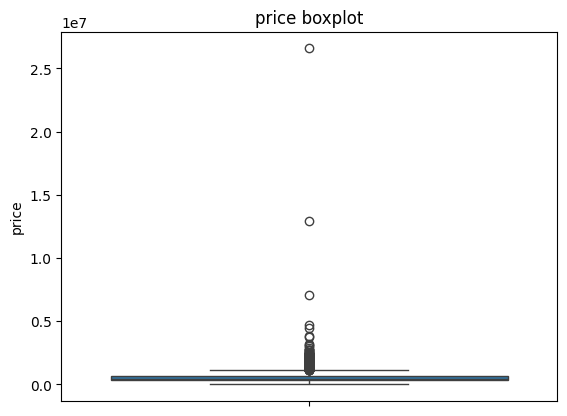

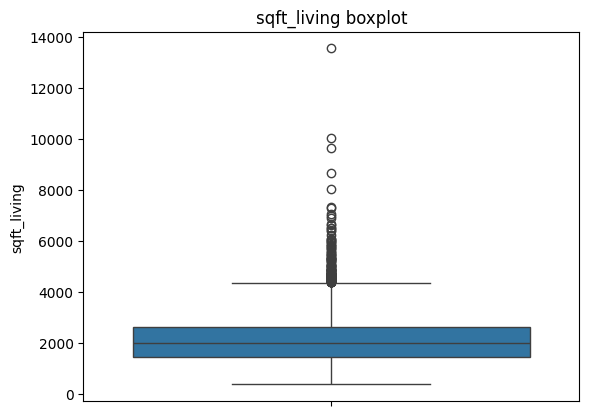

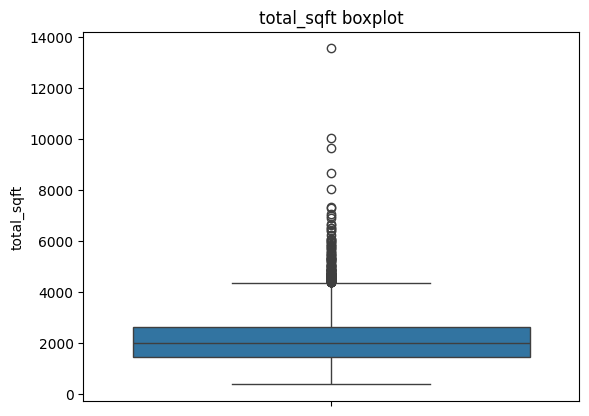

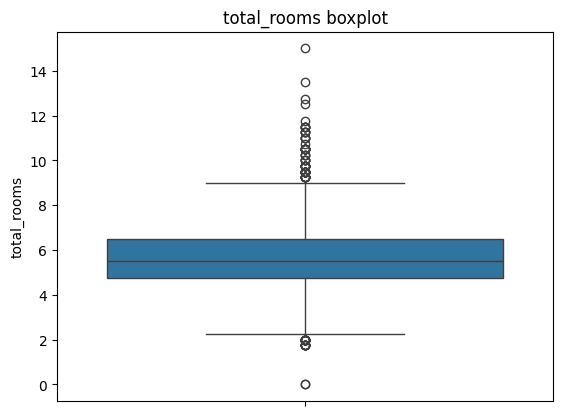

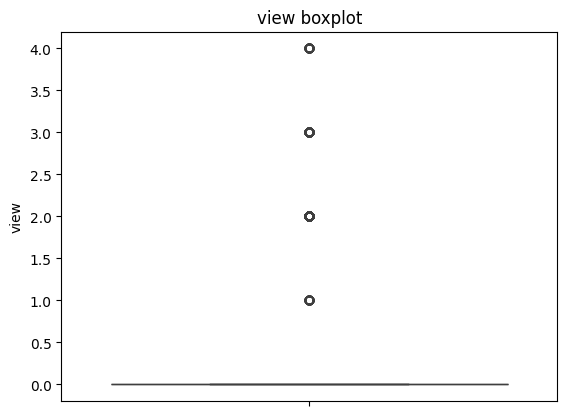

In [26]:
for i in selected_features:
    sns.boxplot(final_df[i])
    plt.title(f"{i} boxplot")
    plt.show()

In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Outliers removed from '{column}': {len(df) - len(df_filtered)} rows")
    return df_filtered

print(f"Original DataFrame shape: {df.shape}")

# Apply outlier removal to price (target variable)
df = remove_outliers_iqr(df, 'price')

# Apply outlier removal to other key numerical features that showed outliers in boxplots
for col in ['sqft_living', 'total_rooms', 'view']:
    df = remove_outliers_iqr(df, col)

print(f"DataFrame shape after outlier removal: {df.shape}")

Original DataFrame shape: (4600, 14)
Outliers removed from 'price': 240 rows
Outliers removed from 'sqft_living': 76 rows
Outliers removed from 'total_rooms': 17 rows
Outliers removed from 'view': 314 rows
DataFrame shape after outlier removal: (3953, 14)


In [28]:
X=df.drop(columns=['price'])
y=df['price']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [32]:
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor()
lr.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [33]:
y_pred=lr.predict(x_test_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 78699.39
RMSE : 116455.44
R²   : 0.703
